# Introduction: 

In the domain of the retail company of videogames the dataset VGsales is going to be analized to determinate sales strategy for the coming winter season. To do so it will be first used the library and import the dataset. Missing variable will be checked and filled with the different EDA procedure to pass to answer some question with visualizations. 

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv("vgsales.csv")

In [3]:
df.shape

(16719, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
print("The data set has {} rows and {} columns".format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())
display(df.dtypes.value_counts())

The data set has 16719 rows and 16 columns


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


float64    9
object     7
Name: count, dtype: int64

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

# Checking for Duplicates: 

In [7]:
df.duplicated().sum() 

0

# Missing Variables: 

In [8]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Check the percentage of Missing variable for each features: 

In [9]:
missing_values = df.isnull().sum()
total_values = df.shape[0]

percentage_missing = (missing_values / total_values) * 100

print(percentage_missing)

Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


In [10]:
df.isnull().sum().sum()

46716

# Handling Missing Variables: 

It has been noticed that there are some features that are having missing variables like: 

    - Name
    - Year_of_Release 
    - Genre               
    - Publisher           
    - Critic_Score
    - Critic_Count
    - User_Score
    - Critic_Count
    - User_Score 
    - User_Count 
    - Developer
    - Rating  
    
To understand how to handle this missing variable is important before to understand which type of variable are; float and object. This is important to understand the correct approach to handle them. It is crucial to handle this before passing to the visualization part to avoid having naan values in the graphs.

Float Missing variable: Critic_Score, Critic_Count, User_count features have missing variable so for this reason they will ve filled with the mean it has been decided to have the average for the natute of the variable. Years of release even tho is a float will be handled into cateregorical variable because we cannot do an average of the years 

In [11]:
numerical_column=['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Count']

In [12]:
for column  in numerical_column:
    df[column].fillna(df[column].mean(), inplace=True)

In [13]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

To handle the feature " Years_of_release" it will be used the mode. The reason behind is that the mode is the variable that will be most of the time present in the dataset

In [14]:
df['Year_of_Release'].fillna(df['Year_of_Release'].mean(), inplace=True)

In [15]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score         6704
User_Count            0
Developer          6623
Rating             6769
dtype: int64

Object features missing variable. Due to the nature of visualization it has been avoided encode the variable to be filled after with the median the mode or the mean but it will be used "Unknown" so it will be noticed in the visualization. it has been avoided the dropna function due to the amount of missin variables 

In [16]:
categorical_columns = ['Name','Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [17]:
for column in categorical_columns:
    df[column].fillna('Unknown', inplace=True)

In [18]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [19]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68.967679,26.360821,Unknown,162.229908,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68.967679,26.360821,Unknown,162.229908,Unknown,Unknown


In [20]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

It is important now to consider that some of the variables that are float should be integers. like years of release, critic score critic count and user count 

# Change float into Integers: 

In [21]:
df['Year_of_Release'] = df['Year_of_Release'].apply(np.int64)
df['Critic_Score'] = df['Critic_Score'].apply(np.int64)
df['Critic_Count'] = df['Critic_Count'].apply(np.int64)
df['User_Count'] = df['User_Count'].apply(np.int64)

In [22]:
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score         int64
Critic_Count         int64
User_Score          object
User_Count           int64
Developer           object
Rating              object
dtype: object

In [23]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,Unknown,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,Unknown,162,Unknown,Unknown


# What are the top 5 games by global sales?

In [24]:
GlobalSales_df=df.loc[df["Global_Sales"]>30]

In [25]:
GlobalSales_df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,Unknown,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,Unknown,162,Unknown,Unknown


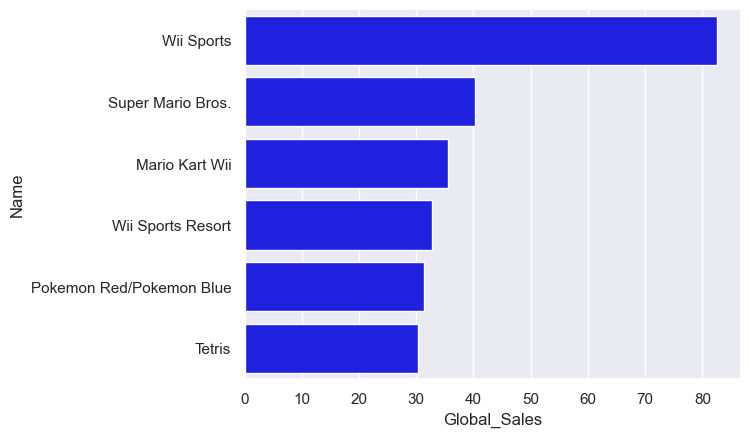

In [26]:
from numpy import mean
sns.barplot(data=GlobalSales_df, x="Global_Sales", y="Name", color="blue", estimator=mean );

# Is there a correlation between the “na_sales” and “jp_sales” for the years 2010-2014?  

The correlation is the Comparison between observations represented by two variables (in this case NA_sales and jp_sales) to determine if they tend to move in the same or opposite directions.To show this it is used a scatterplot


<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

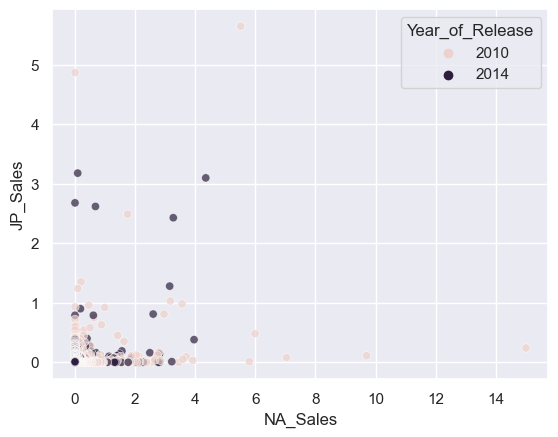

In [27]:
Specific_Years = [2010, 2014]
df_years = df[df['Year_of_Release'].isin(Specific_Years)]

sns.scatterplot(data=df_years, x='NA_Sales', y='JP_Sales', alpha=0.7, hue='Year_of_Release')

# What is the distribution of the most popular 4 game genres?  

histogram is the most useful visualization for distribution 

In [28]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76,51,8,322,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,68,26,Unknown,162,Unknown,Unknown
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82,73,8.3,709,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80,73,8,192,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,68,26,Unknown,162,Unknown,Unknown


In [29]:
sns.catplot(data=df,x="Genre", kind="bar")

TypeError: Horizontal orientation requires numeric `x` variable.

In [ ]:
df.hist(column="Genre")